In [1]:
import numpy as np
from scipy.linalg import *
import matplotlib.pyplot as plt

In [23]:
#Definição das propriedades e mesh

ka = 10 #W/m°C 
kb = 1 #W/m°C
La = 0.073 #m
Lb = 0.017 #m
h = 80 ##W/m²°C
T_infinito = 20 #°C
q0 = 4000 #W/m²
A = 1 #m²; área transversal hipotética
q_ponto = 0 #problema sem geração



meshA = 10
meshB = 10

Matrix_coef_a = np.zeros((meshA+meshB,meshA+meshB))
Matrix_coef_b = np.zeros((meshA+meshB,1))
x_plot = np.zeros((meshA+meshB,1))

deltax_A = La/(meshA-0.5)
deltax_B = Lb/(meshB-0.5)




In [24]:
#ke por interpolação linear

for volume in range(meshA):
    if (volume == 0):
        ae = ka*A/(deltax_A)
        ap = ae
        b = q_ponto*A*deltax_A/2 + q0*A
                
        Matrix_coef_a[volume,volume] = ap
        Matrix_coef_a[volume,volume+1] = -ae
        Matrix_coef_b[volume] = b
        x_plot[volume] = 0
        
    if (volume != 0) and (volume != meshA-1):
        ae = ka*A/(deltax_A)
        aw = ae
        ap = ae + aw
        b = q_ponto*A*deltax_A
        
        Matrix_coef_a[volume,volume] = ap
        Matrix_coef_a[volume,volume+1] = -ae
        Matrix_coef_a[volume,volume-1] = -aw
        Matrix_coef_b[volume] = b
        x_plot[volume] = x_plot[volume-1] + deltax_A 
        
    if (volume == meshA-1):
        fe = deltax_B/(deltax_A+deltax_B)  
        ke = fe*ka + (1-fe)*kb
        
        ae = ke*A/((deltax_A+deltax_B)/2)
        aw = ka*A/(deltax_A)
        ap = ae + aw
        b = q_ponto*A*deltax_A
        
        Matrix_coef_a[volume,volume] = ap
        Matrix_coef_a[volume,volume+1] = -ae
        Matrix_coef_a[volume,volume-1] = -aw
        Matrix_coef_b[volume] = b
        x_plot[volume] = x_plot[volume-1] + deltax_A
    
        
        
for volume in range(meshB):
    if (volume == 0):
        kw = fe*ka + (1-fe)*kb
        
        aw = kw*A/((deltax_A+deltax_B)/2)
        ae = kb*A/(deltax_B)
        ap = ae + aw
        b = q_ponto*A*deltax_B
        
        Matrix_coef_a[meshA + volume,meshA + volume] = ap
        Matrix_coef_a[meshA + volume,meshA + volume+1] = -ae
        Matrix_coef_a[meshA + volume,meshA + volume-1] = -aw
        Matrix_coef_b[meshA + volume] = b
        x_plot[meshA + volume] = x_plot[meshA + volume-1] + (deltax_A+deltax_B)/2
        
        
    if (volume != 0) and (volume != meshB-1):
        ae = kb*A/(deltax_B)
        aw = ae
        ap = ae + aw
        b = q_ponto*A*deltax_B
        
        Matrix_coef_a[meshA + volume,meshA + volume] = ap
        Matrix_coef_a[meshA + volume,meshA + volume+1] = -ae
        Matrix_coef_a[meshA + volume,meshA + volume-1] = -aw
        Matrix_coef_b[meshA + volume] = b
        x_plot[meshA + volume] = x_plot[meshA + volume-1] + deltax_B
        
    if (volume == meshB-1):
        aw = kb*A/(deltax_B)
        aw_f = h*A
        ap = aw + aw_f
        b = q_ponto*A*deltax_B +aw_f * T_infinito
        
        Matrix_coef_a[meshA + volume,meshA + volume] = ap
        Matrix_coef_a[meshA + volume,meshA + volume-1] = -aw
        Matrix_coef_b[meshA + volume] = b
        x_plot[meshA+meshB-1] = 0.09
        
        
T_interpolacao = solve(Matrix_coef_a,Matrix_coef_b)
x_plot = x_plot*1000 #conversão em mm        


In [25]:
#ke por resitências térmicas
#essa parte do código poderia ser simplificada, mas por questões
#de facilidade na correção ela foi mantida

for volume in range(meshA):
    if (volume == 0):
        ae = ka*A/(deltax_A)
        ap = ae
        b = q_ponto*A*deltax_A/2 + q0*A
                
        Matrix_coef_a[volume,volume] = ap
        Matrix_coef_a[volume,volume+1] = -ae
        Matrix_coef_b[volume] = b
        x_plot[volume] = 0
        
    if (volume != 0) and (volume != meshA-1):
        ae = ka*A/(deltax_A)
        aw = ae
        ap = ae + aw
        b = q_ponto*A*deltax_A
        
        Matrix_coef_a[volume,volume] = ap
        Matrix_coef_a[volume,volume+1] = -ae
        Matrix_coef_a[volume,volume-1] = -aw
        Matrix_coef_b[volume] = b
        x_plot[volume] = x_plot[volume-1] + deltax_A 
        
    if (volume == meshA-1):
        fe = deltax_B/(deltax_A+deltax_B)  
        ke = 1/((1-fe)/ka+fe/kb)
        
        ae = ke*A/((deltax_A+deltax_B)/2)
        aw = ka*A/(deltax_A)
        ap = ae + aw
        b = q_ponto*A*deltax_A
        
        Matrix_coef_a[volume,volume] = ap
        Matrix_coef_a[volume,volume+1] = -ae
        Matrix_coef_a[volume,volume-1] = -aw
        Matrix_coef_b[volume] = b
        x_plot[volume] = x_plot[volume-1] + deltax_A
    
        
        
for volume in range(meshB):
    if (volume == 0):
        fw = deltax_B/(deltax_A+deltax_B) 
        kw = 1/((1-fw)/ka+fw/kb)                #verificar
        
        aw = kw*A/((deltax_A+deltax_B)/2)
        ae = kb*A/(deltax_B)
        ap = ae + aw
        b = q_ponto*A*deltax_B
        
        Matrix_coef_a[meshA + volume,meshA + volume] = ap
        Matrix_coef_a[meshA + volume,meshA + volume+1] = -ae
        Matrix_coef_a[meshA + volume,meshA + volume-1] = -aw
        Matrix_coef_b[meshA + volume] = b
        x_plot[meshA + volume] = x_plot[meshA + volume-1] + (deltax_A+deltax_B)/2
        
        
    if (volume != 0) and (volume != meshB-1):
        ae = kb*A/(deltax_B)
        aw = ae
        ap = ae + aw
        b = q_ponto*A*deltax_B
        
        Matrix_coef_a[meshA + volume,meshA + volume] = ap
        Matrix_coef_a[meshA + volume,meshA + volume+1] = -ae
        Matrix_coef_a[meshA + volume,meshA + volume-1] = -aw
        Matrix_coef_b[meshA + volume] = b
        x_plot[meshA + volume] = x_plot[meshA + volume-1] + deltax_B
        
    if (volume == meshB-1):
        aw = kb*A/(deltax_B)
        aw_f = h*A
        ap = aw + aw_f
        b = q_ponto*A*deltax_B +aw_f * T_infinito
        
        Matrix_coef_a[meshA + volume,meshA + volume] = ap
        Matrix_coef_a[meshA + volume,meshA + volume-1] = -aw
        Matrix_coef_b[meshA + volume] = b
        x_plot[meshA+meshB-1] = 0.09
        
        
T_resistencias = solve(Matrix_coef_a,Matrix_coef_b)
x_plot = x_plot*1000 #conversão em mm        


In [45]:
#solução exata

R_conv = 1/(h*A) #Resistência convecção
R_A = La/(ka*A) #Resistência Material A
R_B = Lb/(kb*A) #Resistência Material B

x_plot_exata = [0,73,90] #pontos para plotar Temperatura

T_exata = [q0*(R_conv+R_A+R_B)+T_infinito,q0*(R_conv+R_B)+T_infinito,q0*(R_conv)+T_infinito]


#Para as tabelas:
#Solução analítica: 
#T(x) = -400.x +167,2 para x<= La
#T(x) = -4000.x +430 para x> La

for x in range(meshA+meshB):
    if (x_plot[x]<=73): 
        T_exata_tabela[x] = -400*x_plot[x]/1000 +167.2
    if (x_plot[x]>73):
        T_exata_tabela[x] = -4000*x_plot[x]/1000 +430

(0, 90)

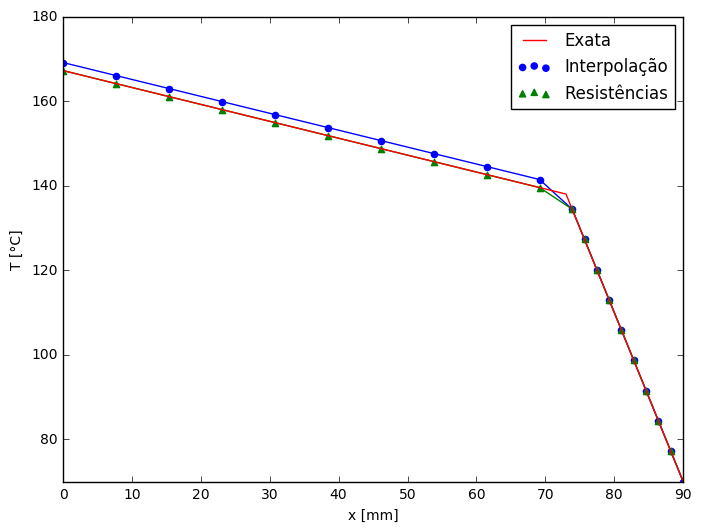

In [50]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(111)    
   
axis.plot(x_plot, T_interpolacao,  color ='blue')
axis.scatter(x_plot, T_interpolacao, color ='blue',label='Interpolação')

axis.plot(x_plot, T_resistencias, color ='green')
axis.scatter(x_plot, T_resistencias, color ='green',marker='^',label='Resistências')

axis.plot(x_plot_exata,T_exata, label='Exata',color ='red')

axis.set_ylabel('T [°C]')
axis.set_xlabel('x [mm]')
axis.set_title('')
axis.legend(loc='best')
axis.set_ylim(70,180)
axis.set_xlim(0,90)


In [47]:
#tabelas com erros

array([[ 167.2       ],
       [ 164.12631579],
       [ 161.05263158],
       [ 157.97894737],
       [ 154.90526316],
       [ 151.83157895],
       [ 148.75789474],
       [ 145.68421053],
       [ 142.61052632],
       [ 139.53684211],
       [ 134.42105263],
       [ 127.26315789],
       [ 120.10526316],
       [ 112.94736842],
       [ 105.78947368],
       [  98.63157895],
       [  91.47368421],
       [  84.31578947],
       [  77.15789474],
       [  70.        ]])